**Домашнее задание:
задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [185]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [186]:
# в большинстве ситуаций такой подход сработает. Единственное исключение, если у нас нулевой класс и 1 - y_pred = 1e-5
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred + 1e-5) + (1.0 - y) * np.log(1.0 - y_pred + 1e-5))
    return err

**задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**


In [187]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [188]:
# функция для стандартизации данных
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [189]:
X_st = X.copy()
X_st[1, :] = calc_std_feat(X[1, :])
X_st[2, :] = calc_std_feat(X[2, :])
X_st[3, :] = calc_std_feat(X[3, :])

In [190]:
# функция сигмоиды
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [191]:
# функция для обучения модели
def eval_model(X, y, iterations, alpha=1e-4, eps=1e-5):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    error_list, weights_history = [], [W]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        error_list.append(err)
        weights_history.append(W)
        if i >= 2 and np.abs(err - error_list[-2]) <= eps:
            print(i, W, err)
            break
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return i, W, weights_history, error_list

In [192]:
i, W, weights_history, error_list = eval_model(X_st, y, iterations=10000000, alpha=0.1, eps=1e-6)

38961 [  5.1294758  -10.52461508 -10.7143454   24.88024585] 0.10875508161387148


In [193]:
# визуализация процесса обучения данных: изменение весов, изменение logloss
def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize=(15, 5)) -> None:
    """
    Визуализация процесса обучения линейной модели: визуализация
    изменения значения ошибки на каждой итерации обучения и
    визуализация изменения значения весов на каждой итерации
    обучения.

    Parameters
    ----------
    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    figsize: Tuple[int, int], optional, default = (15, 5)
        Размер изображения графика. Опциональный параметр,
        по умолчанию равен (15, 5).

    """
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(
        f"Optional rounds: {len(errors_history)}, Error: {round(errors_history[-1], 2)}",
        size=15
    )
    plt.subplot(121)
    plt.plot(errors_history, linewidth=3)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("logloss", size=15)

    plt.subplot(122)
    plt.plot(weights_history, linewidth=3)
    plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("w", size=15)

13371 [ 20.48030199 -34.75706748 -51.13633334 103.81488101] 0.014453176827150416
learning_rate = 10, n_iterations = 100000, error = 0.014453176827150416
27806 [ 11.20504414 -20.4389875  -25.93608645  55.34310247] 0.04875212020533898
learning_rate = 1, n_iterations = 100000, error = 0.04875212020533898
38961 [  5.1294758  -10.52461508 -10.7143454   24.88024585] 0.10875508161387148
learning_rate = 0.1, n_iterations = 100000, error = 0.10875508161387148
62353 [ 1.80351154 -4.99970906 -4.03137603 10.49922479] 0.20881828175519823
learning_rate = 0.01, n_iterations = 100000, error = 0.20881828175519823


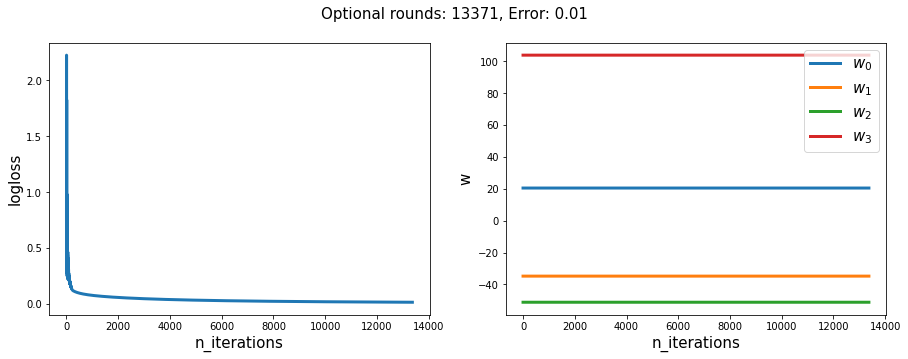

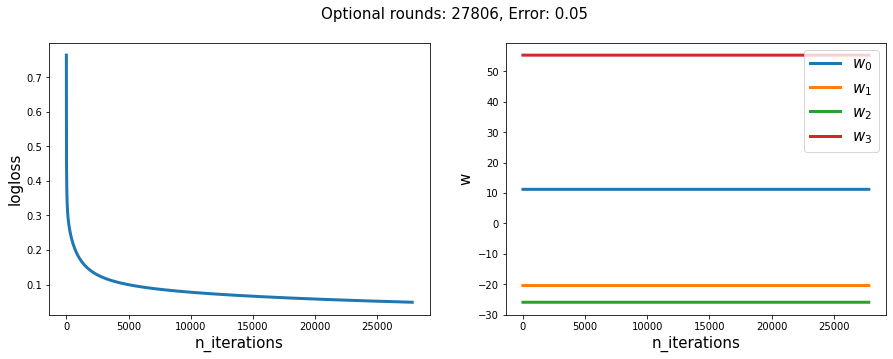

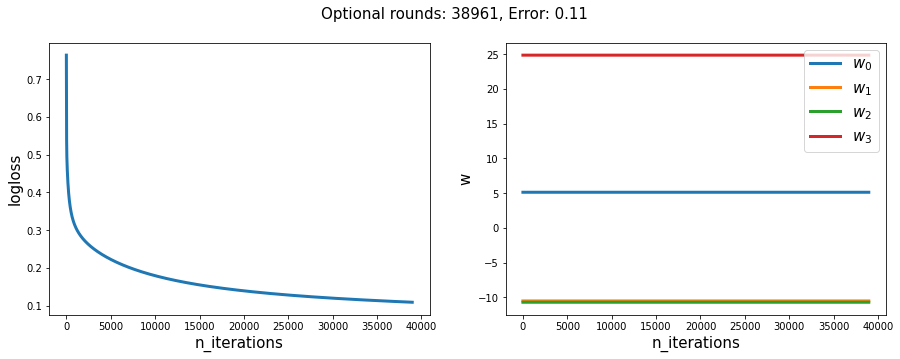

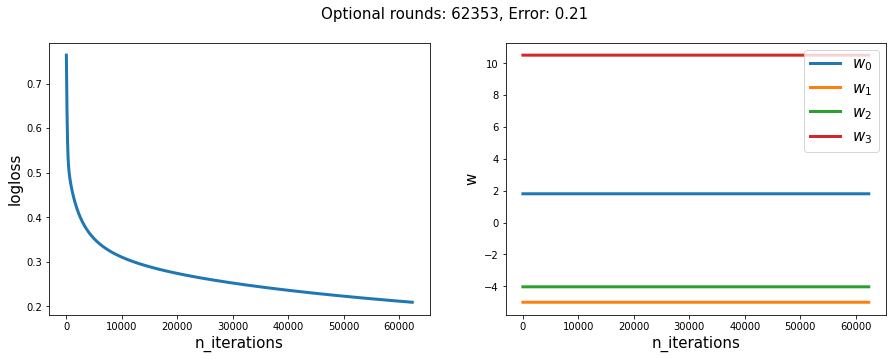

In [194]:
# применим функцию eval_model для различных вариантов скорости обучения
np.random.seed(27)
parameters_grid = [
    (10, 100000), (1, 100000), (0.1, 100000), (0.01, 100000)
]
for alpha, iterations in parameters_grid:
    i, W, weights_history, error_list = eval_model(
        X_st, y, alpha=alpha, iterations=iterations, eps=1e-6
    )
    print(f"learning_rate = {alpha}, n_iterations = {iterations}, error = {min(error_list)}")
    plot_fit_history(weights_history, error_list)

С точки зрения минимального значения logloss, лучшим оказался вариант с самой высокой скоростью обучения (alpha=10).

**задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [195]:
# функция выдает как вероятность класса 1, так и вероятность нулевого класса
def calc_pred_proba(W, X):
  y_pred_proba = []
  scalar_dot = np.dot(W, X)
  for i in scalar_dot:
      proba_1 = sigmoid(i)
      y_pred_proba.append([proba_1, 1 - proba_1])
  return np.array(y_pred_proba)

In [196]:
calc_pred_proba(W, X_st)

array([[3.09932829e-01, 6.90067171e-01],
       [7.84778833e-02, 9.21522117e-01],
       [9.99845994e-01, 1.54005938e-04],
       [1.63580967e-01, 8.36419033e-01],
       [7.63693519e-01, 2.36306481e-01],
       [1.81088843e-01, 8.18911157e-01],
       [9.99975797e-01, 2.42031908e-05],
       [7.90015059e-02, 9.20998494e-01],
       [4.04984370e-01, 5.95015630e-01],
       [9.98770472e-01, 1.22952799e-03]])

**задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [197]:
# функция, возвращающая предсказанный класс
def calc_pred(W, X, threshold=0.5):
    y_pred=[]
    proba = calc_pred_proba(W, X)
    for i in proba:
        if i[0] > threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return np.array(y_pred)

In [199]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

**задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [201]:
# функция подсчета accuracy
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y)):
      if y[i] == y_pred[i]:
          correct += 1
    accuracy = correct / len(y)
    return accuracy

In [202]:
accuracy_score(y, y_pred)

0.9

In [205]:
# матрица ошибок
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[5, 0],
       [1, 4]])

In [206]:
# функция подсчета precision
def precision(confusion_matrix):
    precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    return precision

In [207]:
precision(confusion_matrix)

1.0

In [208]:
# функция подсчета recall
def recall(confusion_matrix):
    recall = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
    return recall

In [209]:
recall(confusion_matrix)

0.8333333333333334

In [210]:
# функция подсчета f1_score
def f1_score(confusion_matrix):
    f1_score = (2 * precision(confusion_matrix) * recall(confusion_matrix)) / (precision(confusion_matrix) + recall(confusion_matrix))
    return f1_score

In [211]:
f1_score(confusion_matrix)

0.9090909090909091

**задание 6: Могла ли модель переобучиться? Почему?**

Конечно, модель могла переобучиться. Во-первых, очень мало данных в обучающей выборке. Во-вторых, в модели нет регуляризатора. Значения весов достаточно большие, что также косвенно говорит о переобучении.

**задание 7: (опция) Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.**

In [212]:
# функция eval_model с добавлением L2-регуляризатора
def eval_model_l2(X, y, iterations, alpha=1e-4, eps=1e-5, lambda_=1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    error_list, weights_history = [], [W]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + 2*lambda_*np.linalg.norm(W, ord=2))
        error_list.append(err)
        weights_history.append(W)
        if i >= 2 and np.abs(err - error_list[-2]) <= eps:
            print(i, W, err)
            break
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return i, W, weights_history, error_list

147 [-36.37180682 -36.74492488 -35.83353188 -34.71922191] 9.2103380723262
learning_rate = 0.01, n_iterations = 100000, error = 0.5388845302503309
1405 [-30.03724541 -30.42893936 -29.52441248 -28.42286565] 9.21032762346886
learning_rate = 0.001, n_iterations = 100000, error = 0.5387076580431915
1864 [-0.03103793 -0.69434147  0.09681761  0.99266168] 0.5387088883097395
learning_rate = 0.0001, n_iterations = 100000, error = 0.5387088883097395
17929 [-0.01372789 -0.67652042  0.11442011  1.00951269] 0.5390904174021888
learning_rate = 1e-05, n_iterations = 100000, error = 0.5390904174021888


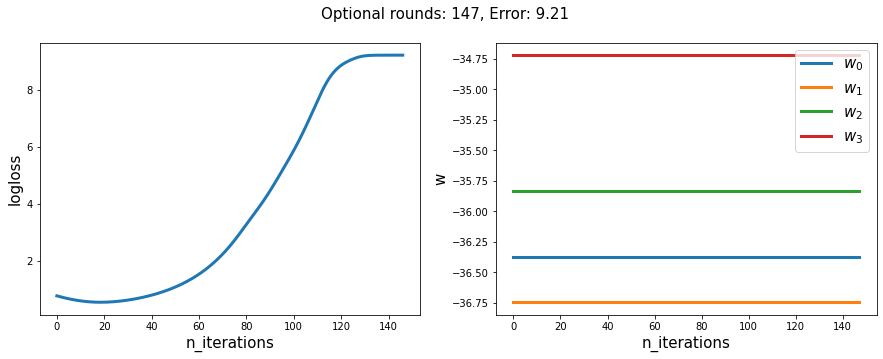

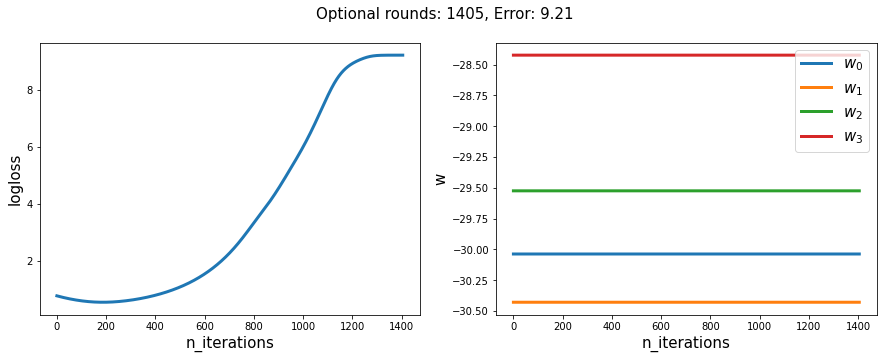

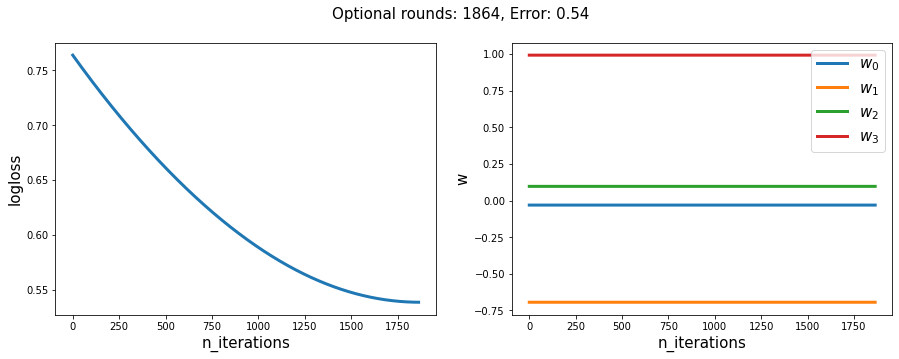

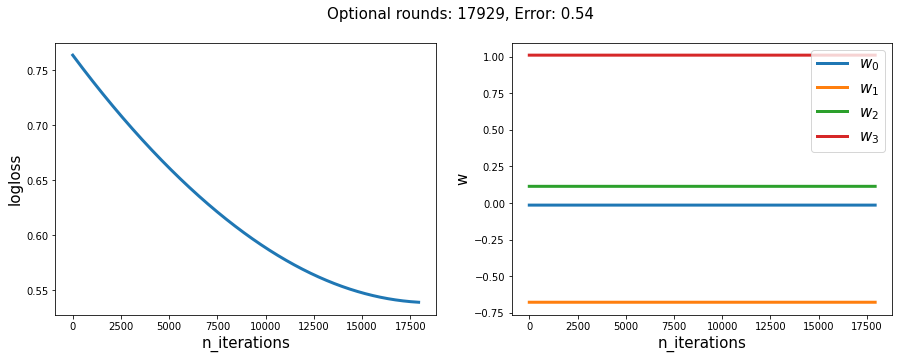

In [213]:
# применим функцию eval_model_l2 для различных вариантов скорости обучения
np.random.seed(27)
parameters_grid = [
    (0.01, 100000), (0.001, 100000), (0.0001, 100000), (0.00001, 100000)
]
for alpha, iterations in parameters_grid:
    i, W, weights_history, error_list = eval_model_l2(
        X_st, y, alpha=alpha, iterations=iterations, eps=1e-6
    )
    print(f"learning_rate = {alpha}, n_iterations = {iterations}, error = {min(error_list)}")
    plot_fit_history(weights_history, error_list)

In [215]:
# с помощью обученной модели предскажем метки классов
y_pred_l2 = calc_pred(W, X_st)
y_pred_l2

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

Ниже посчитаны основные метрики

In [216]:
accuracy_score(y, y_pred_l2)

0.8

In [217]:
from sklearn.metrics import confusion_matrix

confusion_matrix_l2 = confusion_matrix(y, y_pred_l2)
confusion_matrix_l2

array([[4, 1],
       [1, 4]])

In [218]:
precision(confusion_matrix_l2)

0.8

In [219]:
recall(confusion_matrix_l2)

0.8

In [220]:
f1_score(confusion_matrix_l2)

0.8000000000000002

In [222]:
# Веса в модели стали маленькими благодаря L2-регуляризатору:
W

array([-0.01372789, -0.67652042,  0.11442011,  1.00951269])

In [176]:
# функция eval_model с добавлением L1-регуляризатора
def eval_model_l1(X, y, iterations, alpha=1e-4, eps=1e-5, lambda_=1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    error_list, weights_history = [], [W]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_*np.sign(W))
        error_list.append(err)
        weights_history.append(W)
        if i >= 2 and np.abs(err - error_list[-2]) <= eps:
            print(i, W, err)
            break
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return i, W, weights_history, error_list

100000 [-0.00500627  0.00274574  0.00149295 -0.00372387] 0.6928336600799483
learning_rate = 0.01, n_iterations = 100000, error = 0.613295951399171
571 [ 6.63707330e-04 -1.03581595e-03  4.83884946e-04  9.07247938e-01] 0.615932485310516
learning_rate = 0.001, n_iterations = 100000, error = 0.615797967008245
5384 [5.45717326e-05 5.05761102e-05 5.21022056e-03 9.40328437e-01] 0.6170676049791913
learning_rate = 0.0001, n_iterations = 100000, error = 0.6170676049791913
39636 [9.23792207e-02 3.65022304e-06 1.68770963e-01 1.08801057e+00] 0.6474392212026714
learning_rate = 1e-05, n_iterations = 100000, error = 0.6474392212026714


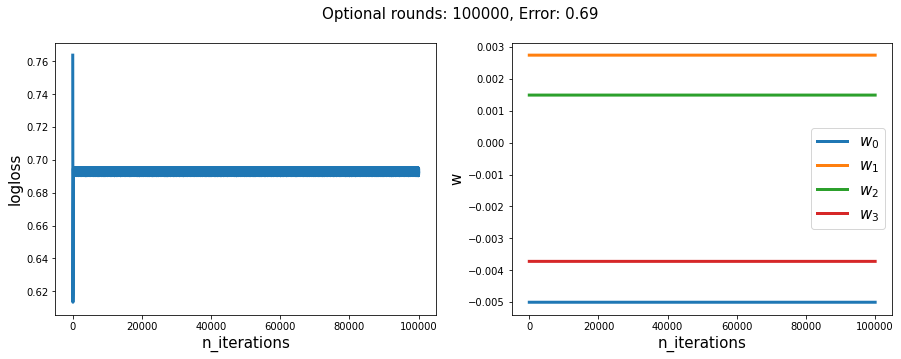

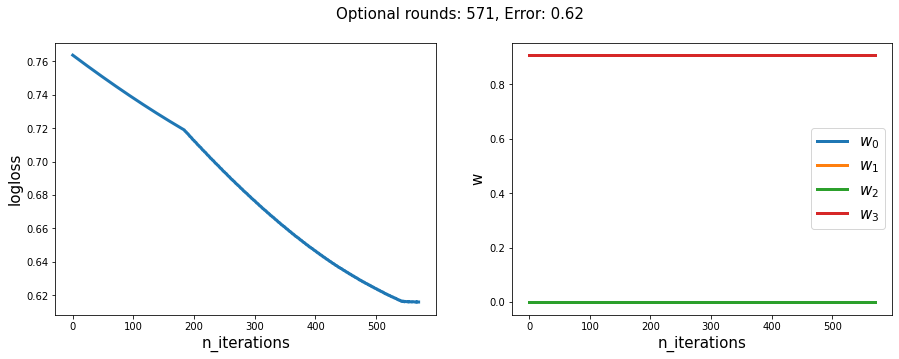

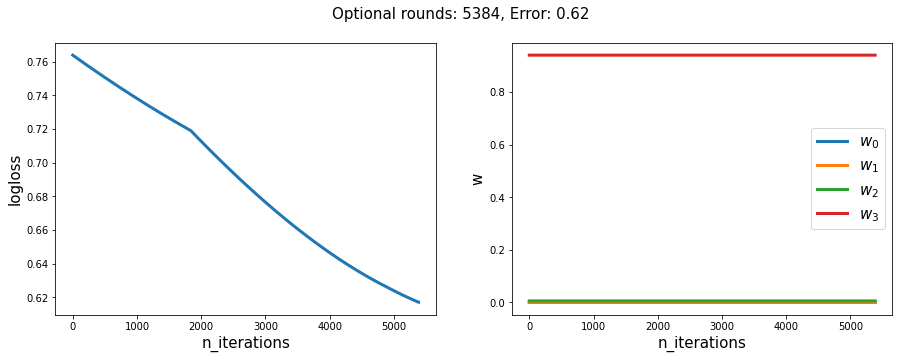

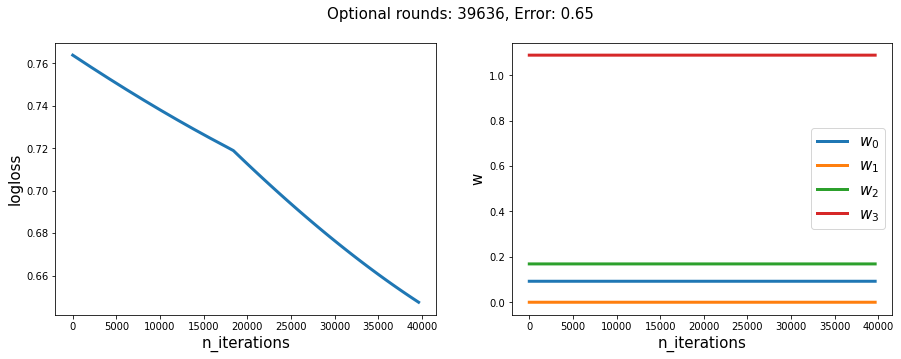

In [223]:
# применим функцию eval_model_l1 для различных вариантов скорости обучения
np.random.seed(27)
parameters_grid = [
    (0.01, 100000), (0.001, 100000), (0.0001, 100000), (0.00001, 100000)
]
for alpha, iterations in parameters_grid:
    i, W, weights_history, error_list = eval_model_l1(
        X_st, y, alpha=alpha, iterations=iterations, eps=1e-6
    )
    print(f"learning_rate = {alpha}, n_iterations = {iterations}, error = {min(error_list)}")
    plot_fit_history(weights_history, error_list)

In [224]:
# с помощью обученной модели предскажем метки классов
y_pred_l1 = calc_pred(W, X_st)
y_pred_l1

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

Ниже посчитаны основные метрики

In [225]:
accuracy_score(y, y_pred_l1)

0.8

In [226]:
from sklearn.metrics import confusion_matrix

confusion_matrix_l1 = confusion_matrix(y, y_pred_l1)
confusion_matrix_l1

array([[4, 1],
       [1, 4]])

In [227]:
precision(confusion_matrix_l1)

0.8

In [228]:
recall(confusion_matrix_l1)

0.8

In [229]:
f1_score(confusion_matrix_l1)

0.8000000000000002

In [230]:
# L1-регуляризатор фактически занулил вес второго признака:
W

array([9.23792207e-02, 3.65022304e-06, 1.68770963e-01, 1.08801057e+00])